In [1]:
""" First notebook looking at the merged sleep_position/o2 data """

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set(style="ticks")
sns.set_context(context="talk")

In [2]:
df = pd.read_csv("/Users/kmcmanus/Documents/classes/digitalhealth_project/data/formatted_data/20200526_sleep_pos_5S.csv",
                index_col='datetime', parse_dates=True, infer_datetime_format=True)
df['sleep_night'] = pd.to_datetime(df['sleep_night'])
df.head()

Orientation  Inclination sleep_night  SpO2(%)  \
datetime                                                             
2020-03-31 20:42:00       -14.82        81.41  2020-03-31      NaN   
2020-03-31 20:42:05       -14.87        82.20  2020-03-31      NaN   
2020-03-31 20:42:10       -14.25        82.38  2020-03-31      NaN   
2020-03-31 20:42:15       -14.89        81.73  2020-03-31      NaN   
2020-03-31 20:42:20       -14.91        81.78  2020-03-31      NaN   

                     Pulse Rate(bpm)  Motion  Vibration  
datetime                                                 
2020-03-31 20:42:00              NaN     NaN        NaN  
2020-03-31 20:42:05              NaN     NaN        NaN  
2020-03-31 20:42:10              NaN     NaN        NaN  
2020-03-31 20:42:15              NaN     NaN        NaN  
2020-03-31 20:42:20              NaN     NaN        NaN

In [3]:
print("Total # rows: {}".format(df.shape[0]))
df_subset = df.dropna()
print("# rows after na drop: {}".format(df_subset.shape[0]))

Total # rows: 967680
# rows after na drop: 100827


In [4]:
df_subset.describe()

Orientation    Inclination        SpO2(%)  Pulse Rate(bpm)  \
count  100827.000000  100827.000000  100827.000000    100827.000000   
mean      -15.725180      92.354492      95.846916        61.313497   
std        73.536082      17.457866       1.706815         4.603452   
min      -179.630000      46.460000      79.000000        47.000000   
25%       -79.740000      76.740000      95.000000        58.000000   
50%       -14.530000      95.150000      96.000000        61.000000   
75%        65.350000     106.130000      97.000000        64.000000   
max       179.510000     178.910000      99.000000        93.000000   

              Motion      Vibration  
count  100827.000000  100827.000000  
mean        1.180706       0.049511  
std         7.462625       2.516935  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         0.000000       0.000000  
75%         0.000000       0.000000  
max       147.000000     128.000000

In [5]:
# How many days I have measurements for both sleep position and O2
dates = np.unique(df_subset['sleep_night'])
dates = [pd.Timestamp(date) for date in dates]
print("Number of dates: {}".format(len(dates)))

Number of dates: 23


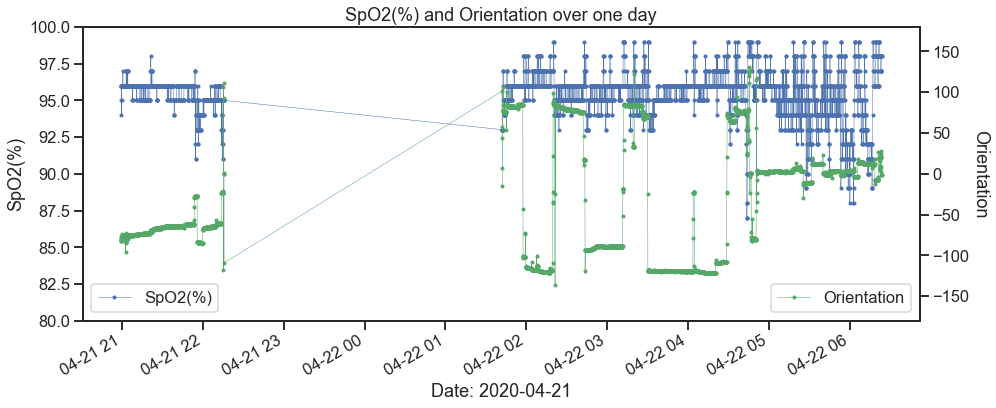

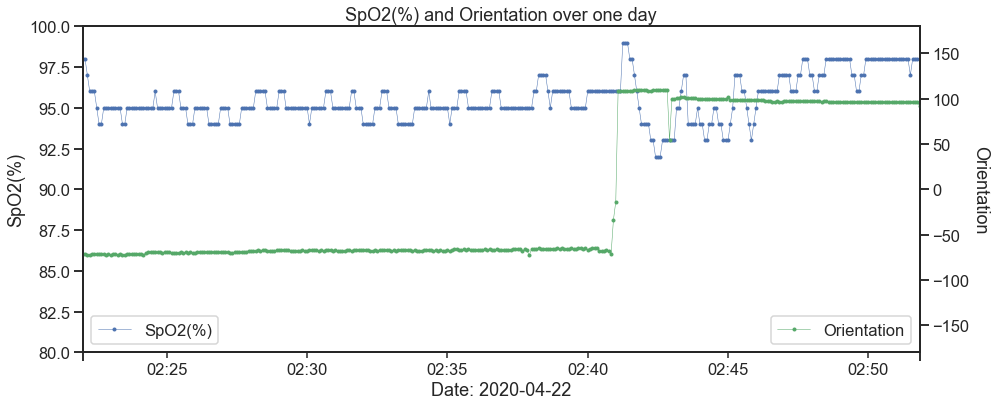

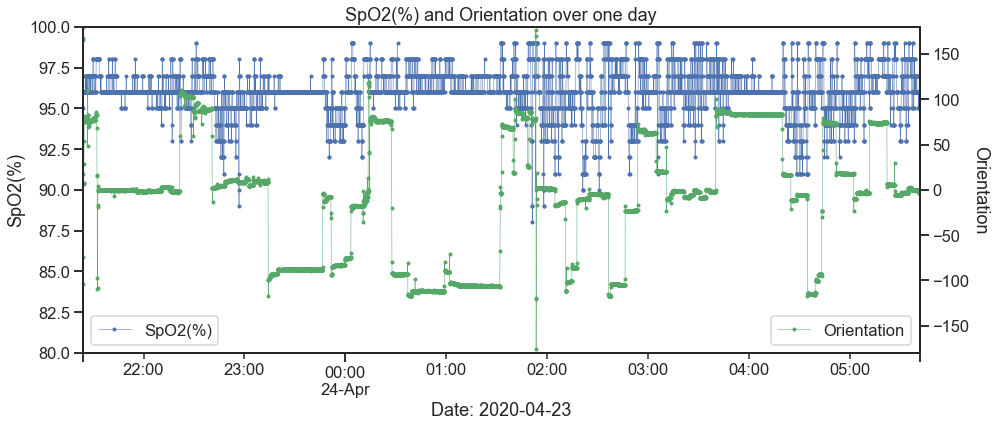

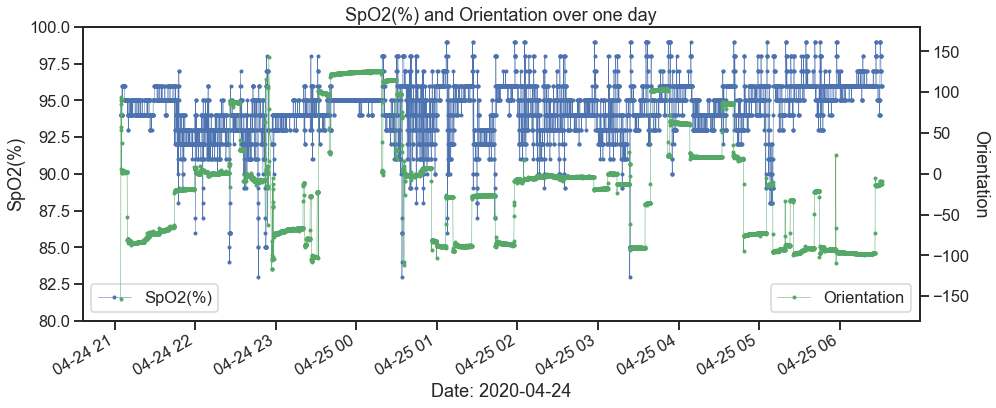

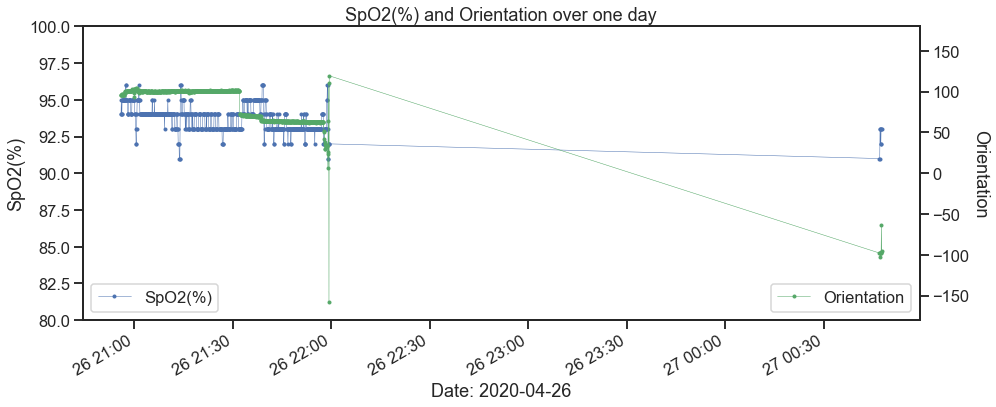

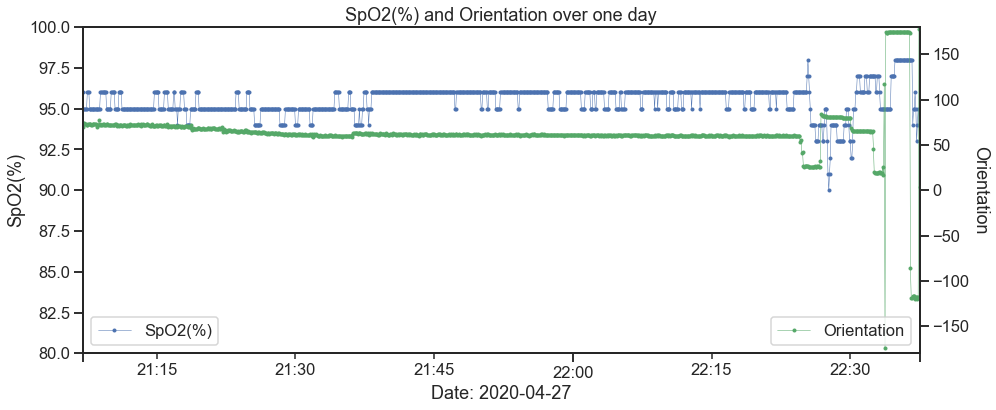

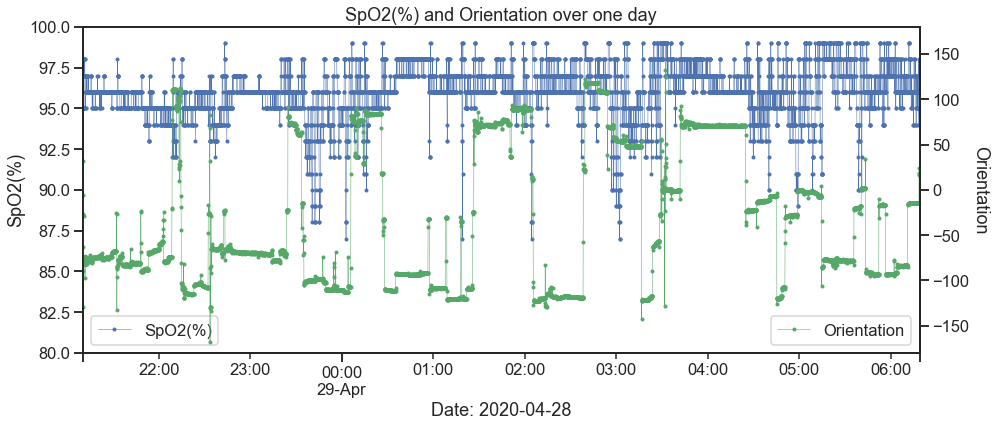

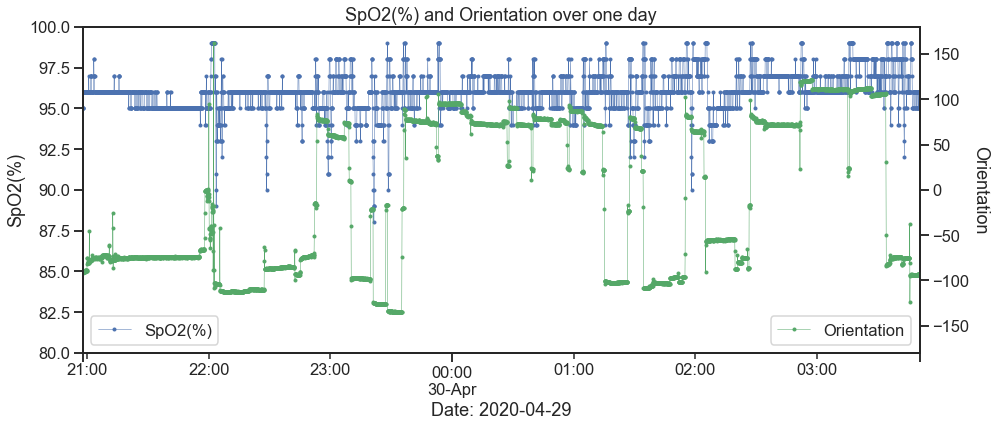

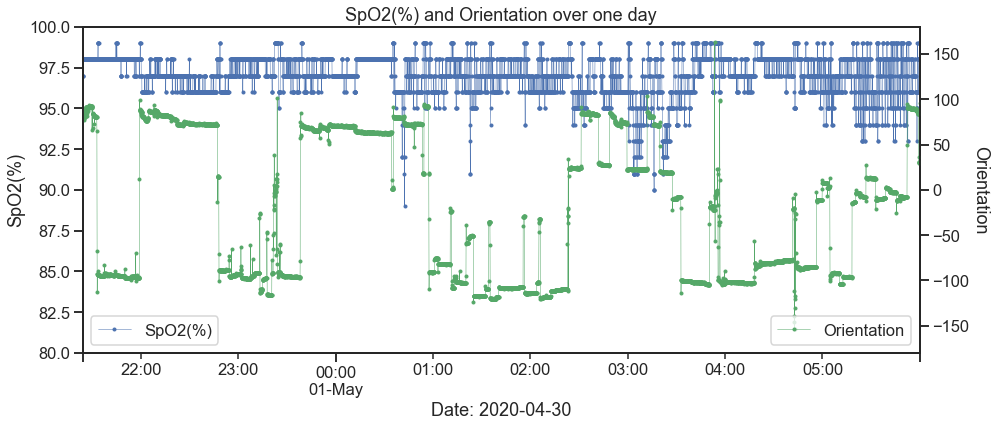

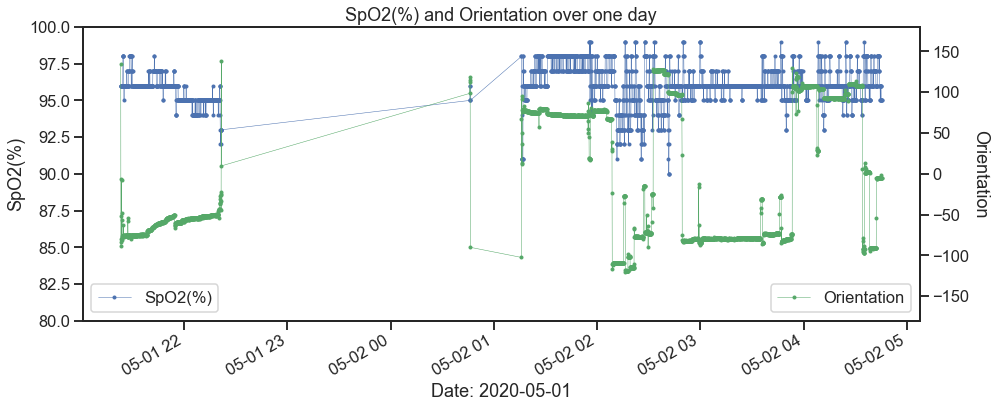

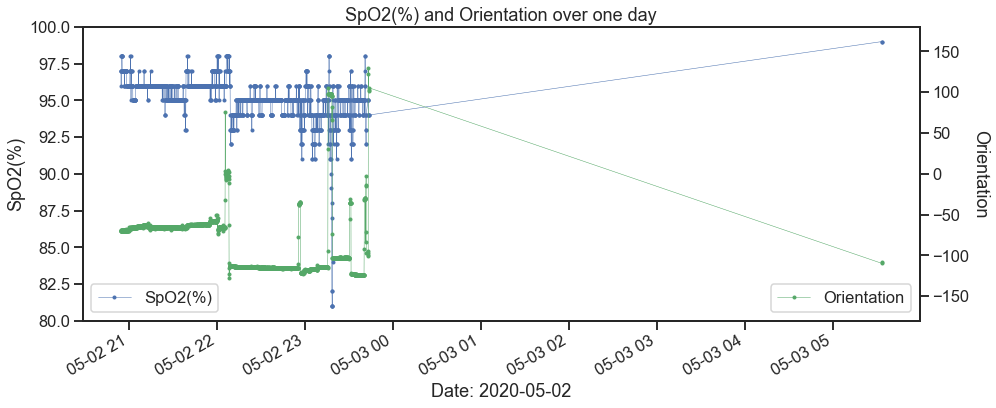

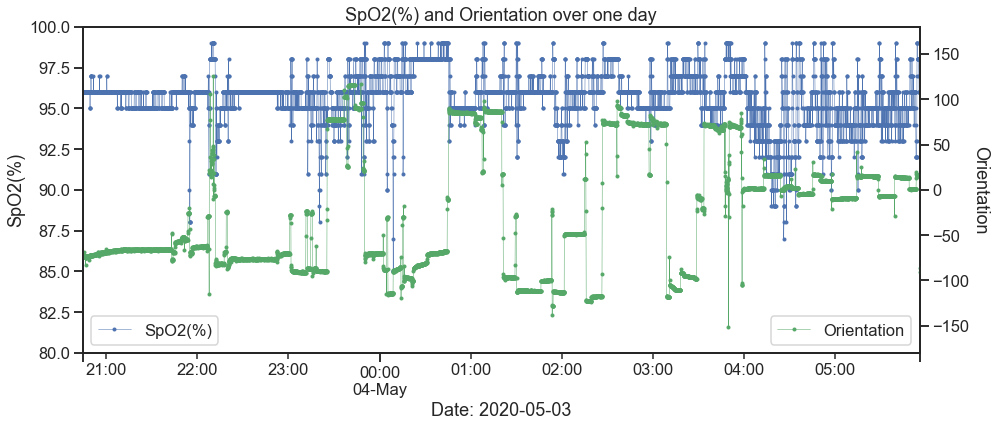

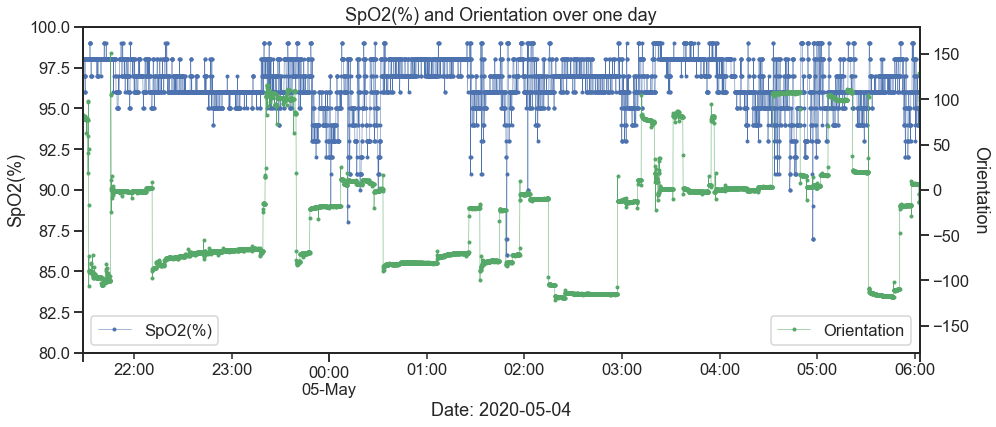

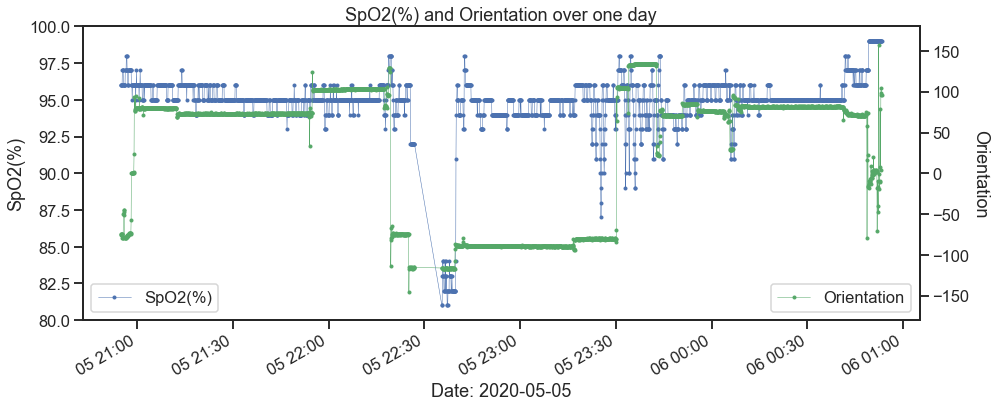

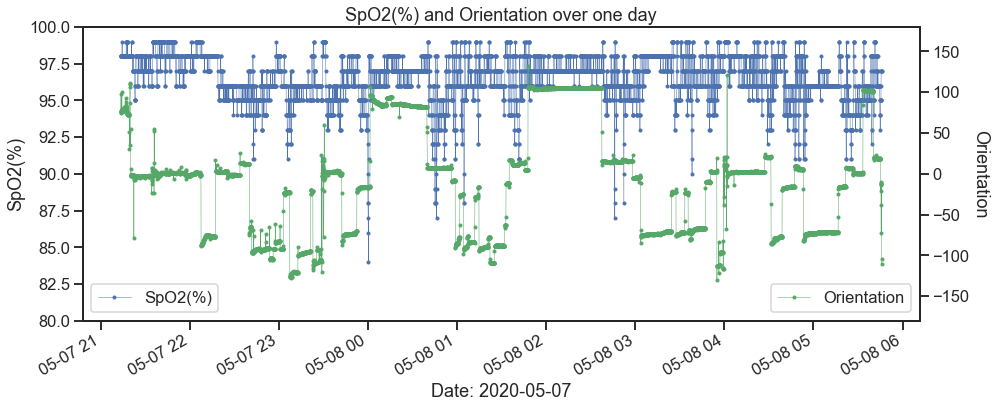

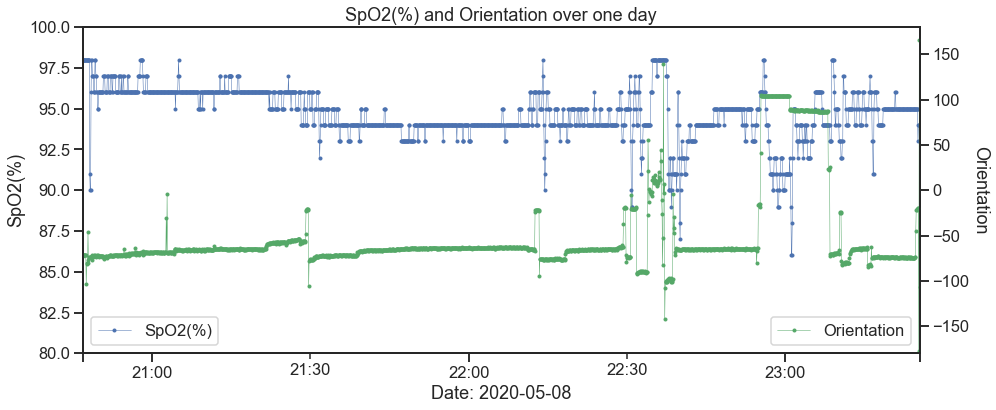

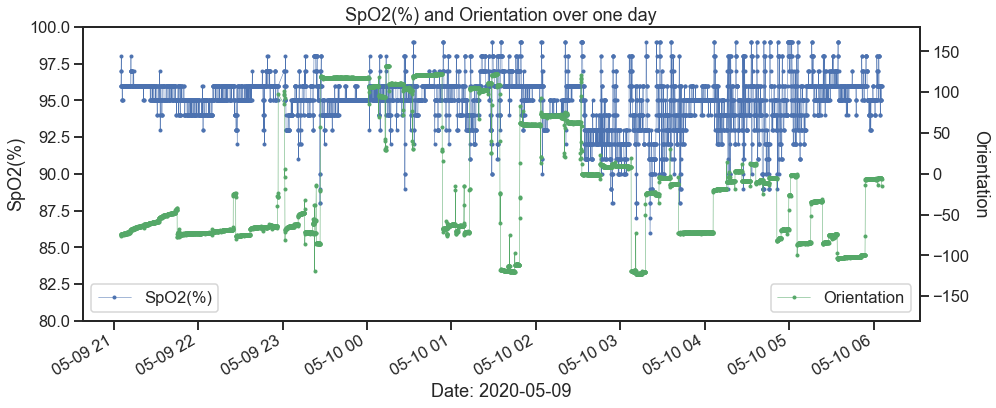

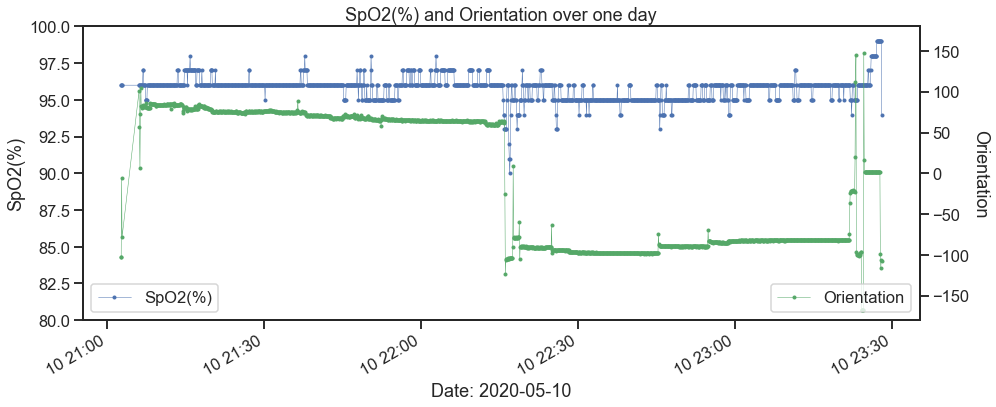

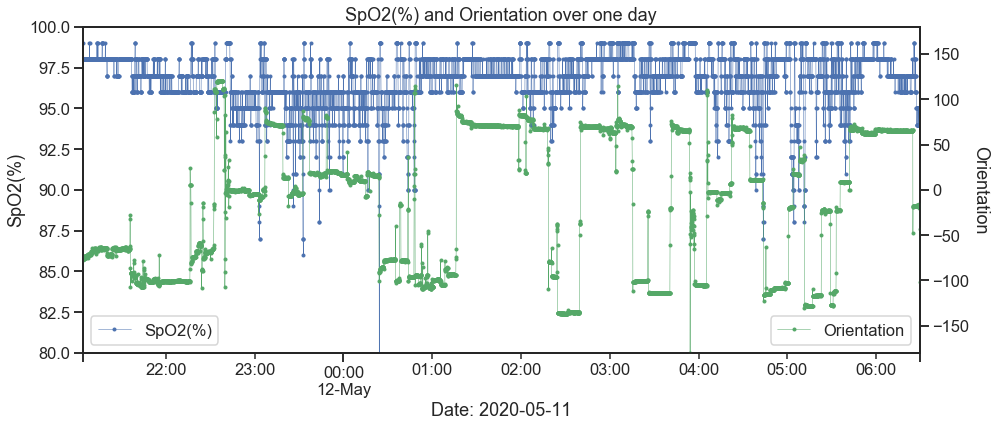

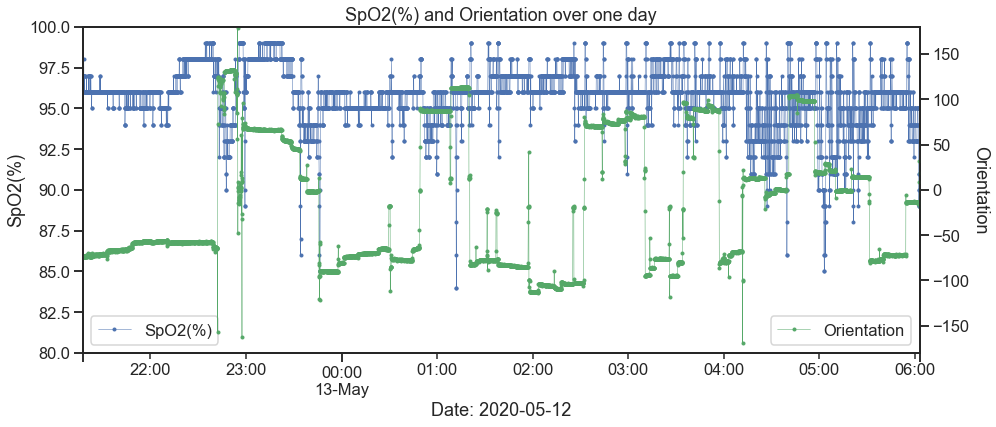

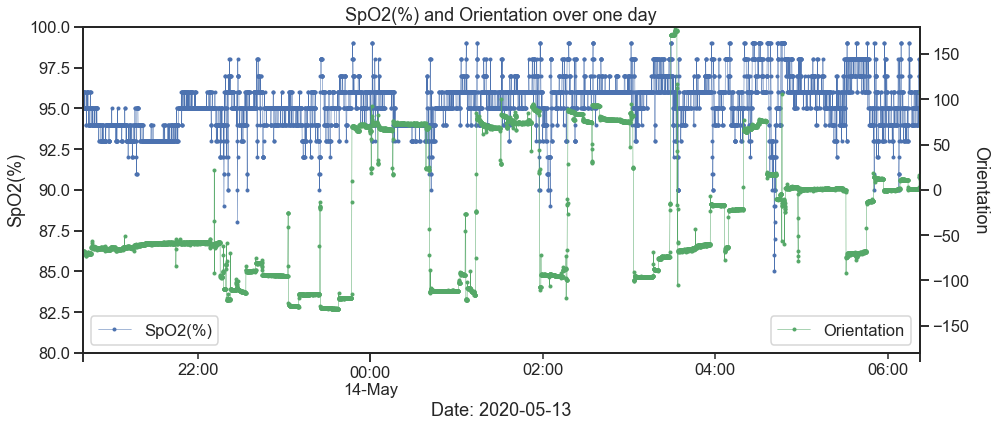

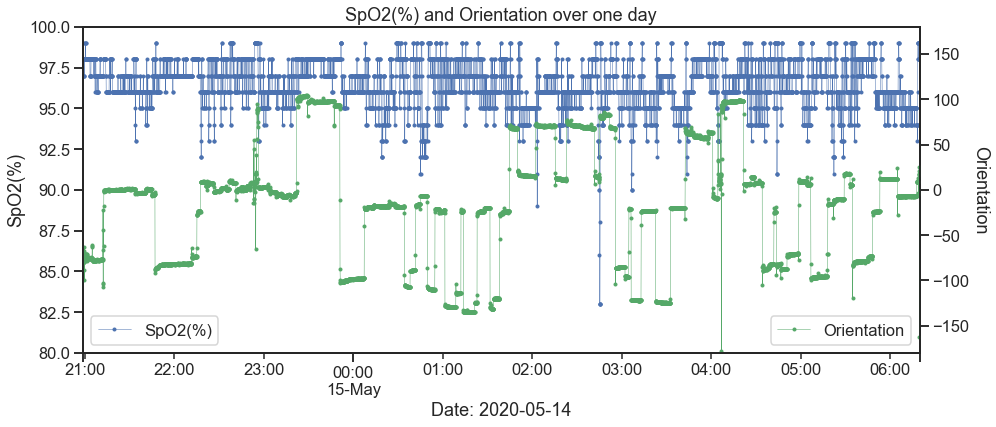

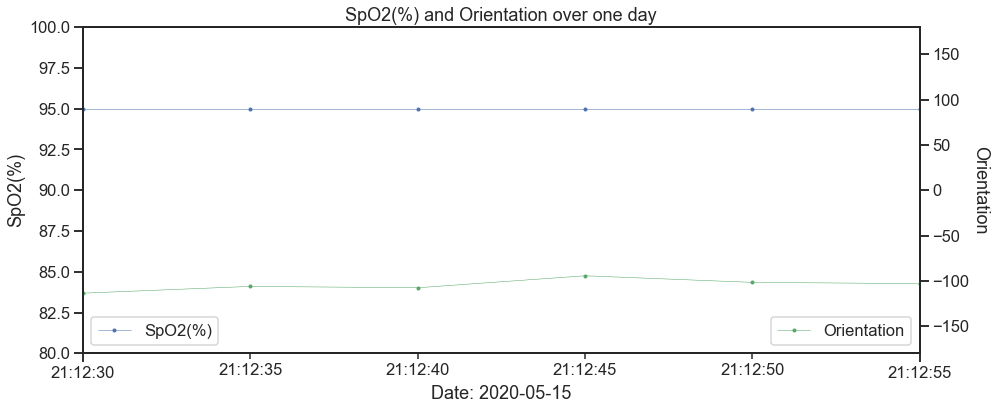

In [6]:
# Plot orientation and spo2 on same graph
for date in dates:
    date_df = df_subset[(df_subset["sleep_night"] == pd.Timestamp(date))]
    if date_df.shape[0] == 0:
        continue
    date_df['date_i_guess'] = date_df.index
    ax = date_df.plot("date_i_guess", "SpO2(%)", legend=False, linewidth=0.5, figsize=(15, 6),
                      markersize=3, marker="o", markerfacecolor="b")
    ax.legend(loc="lower left")
    ax2 = ax.twinx()
    date_df.plot(x="date_i_guess", y="Orientation", ax=ax2, linewidth=0.5, legend=False,
                 color="g", markersize=3, marker="o", markerfacecolor="g")
    ax.set(ylim=(80, 100))
    plt.title("SpO2(%) and Orientation over one day")
    ax.set_ylabel("SpO2(%)")
    ax2.set_ylabel("Orientation", rotation=270, labelpad=20)
    ax2.set(ylim=(-180, 180))
    ax.set_xlabel("Date: {}".format(date.date()))
    ax2.legend(loc="lower right")

In [7]:
# Plots are a little choppy, lets make them more clear by putting orientation in 3 buckets
df_subset["Orient_bin"] = None
df_subset.loc[df_subset["Orientation"] > 40, "Orient_bin"] = -1 # Right
df_subset.loc[(df_subset["Orientation"] > -85) & (df_subset["Orientation"] <= 40), "Orient_bin"] = 0 # Back
df_subset.loc[(df_subset["Orientation"] > -500) & (df_subset["Orientation"] <= -85), "Orient_bin"] = 1 #Left

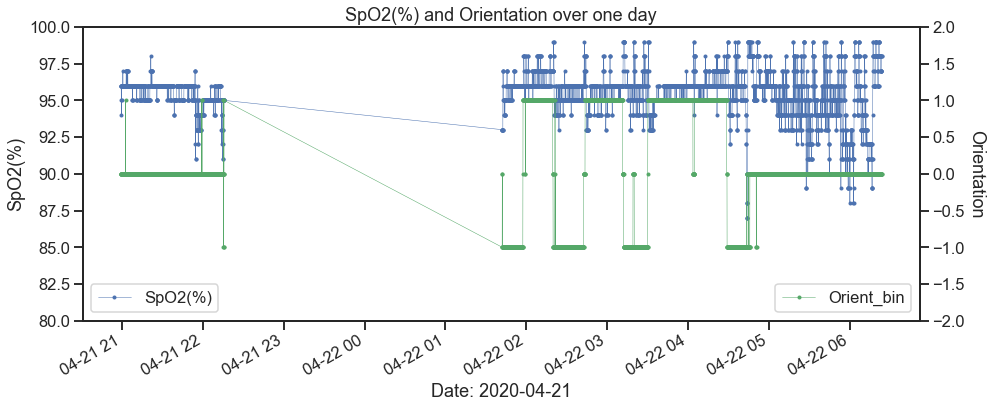

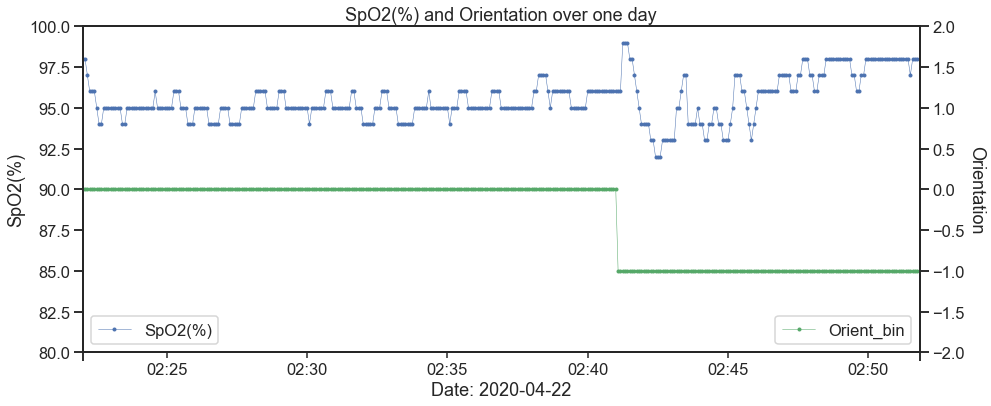

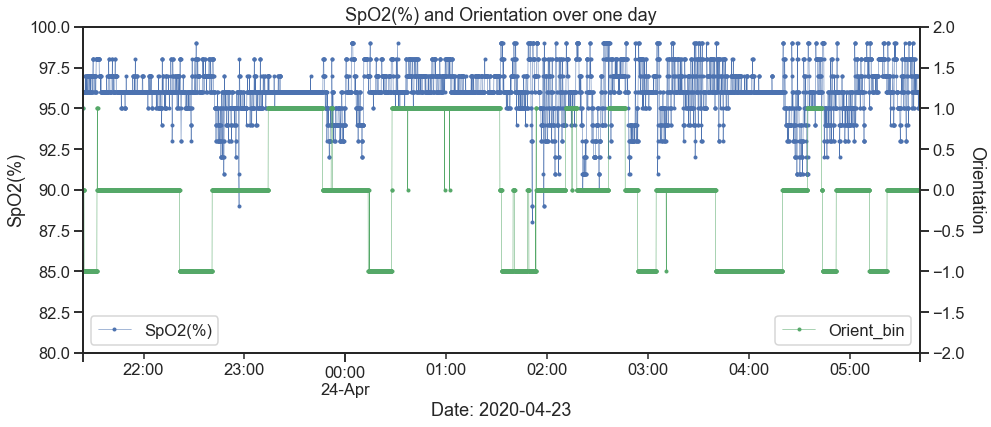

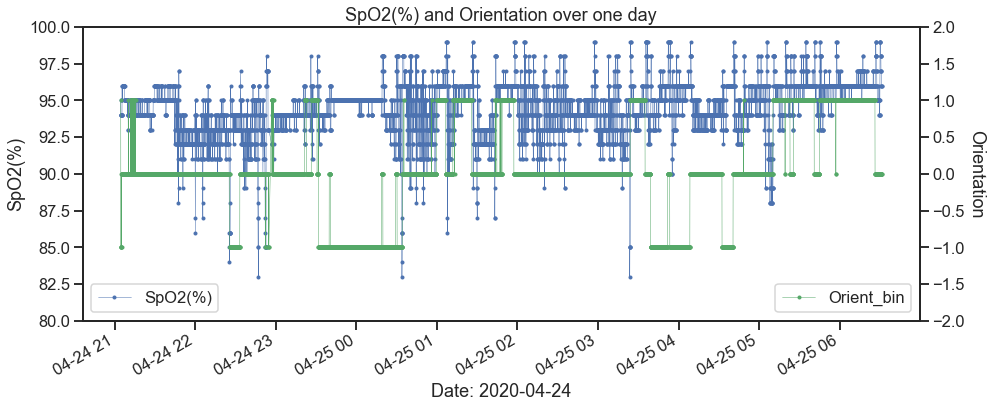

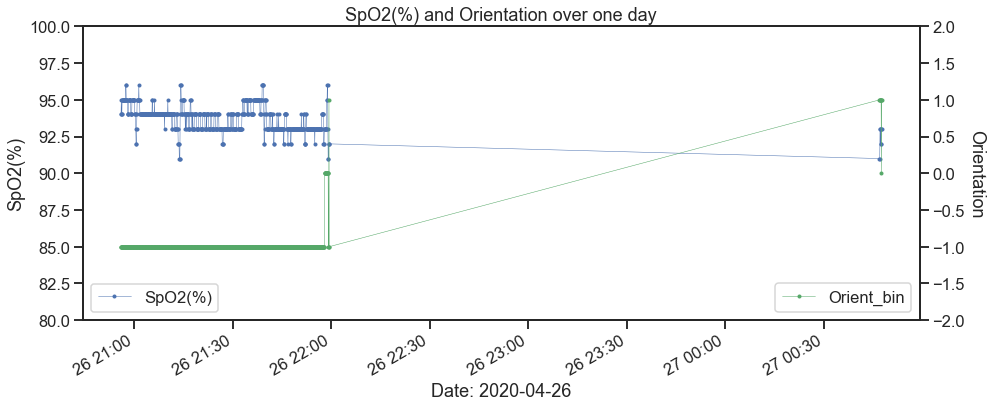

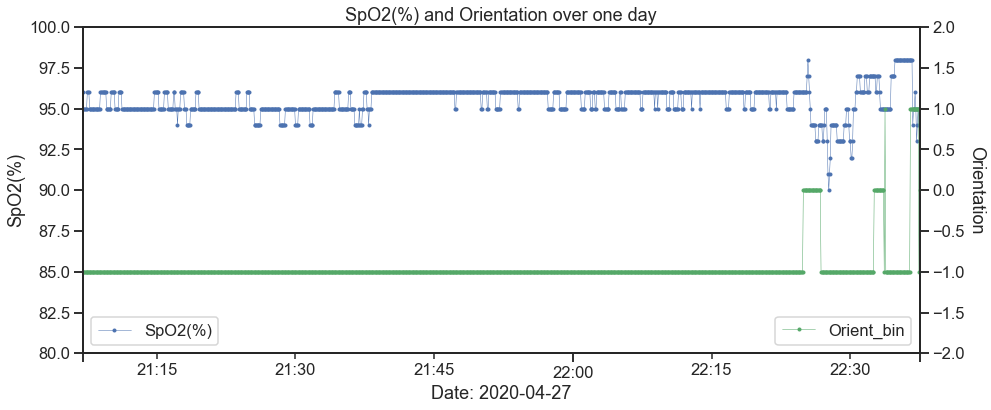

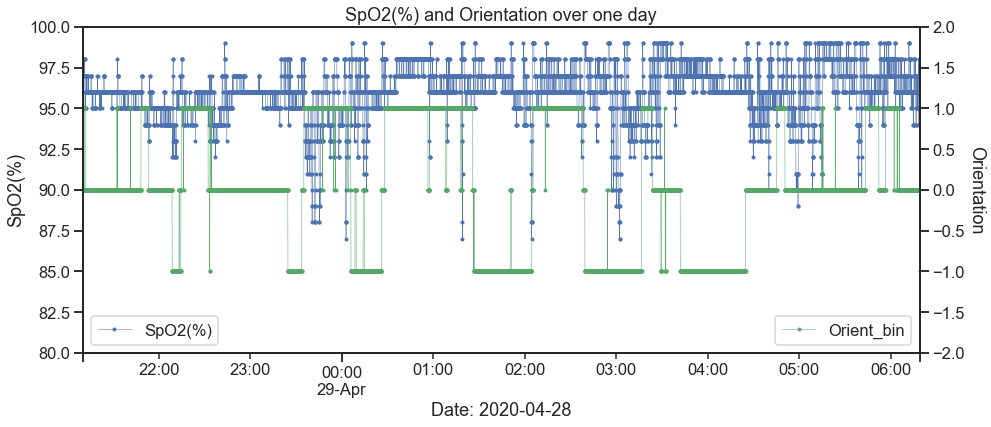

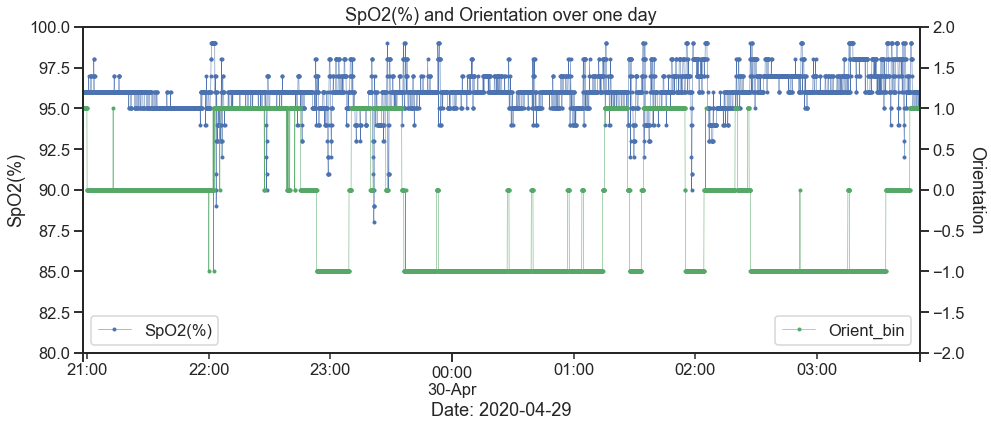

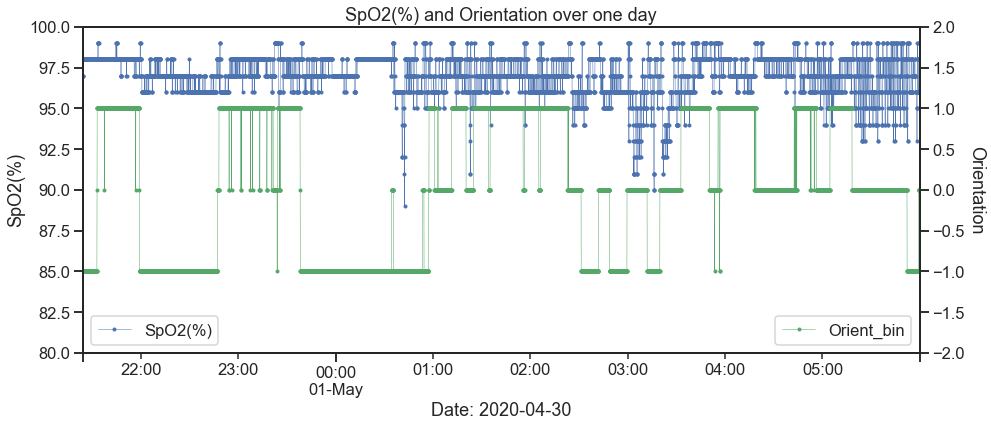

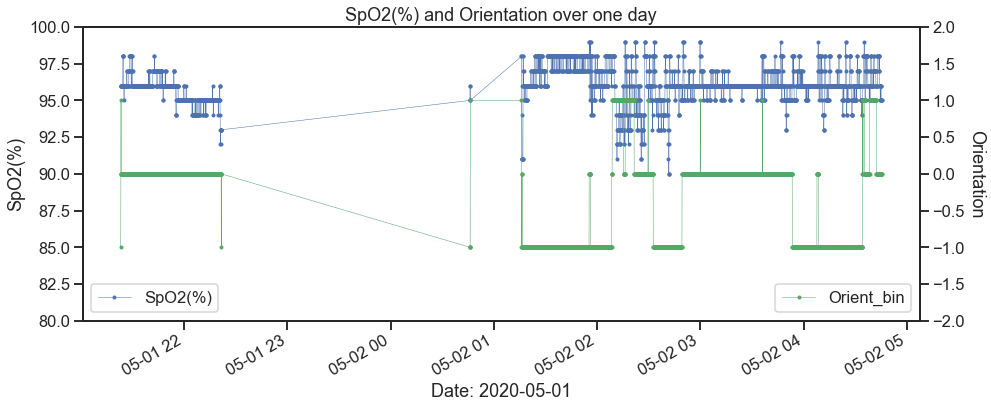

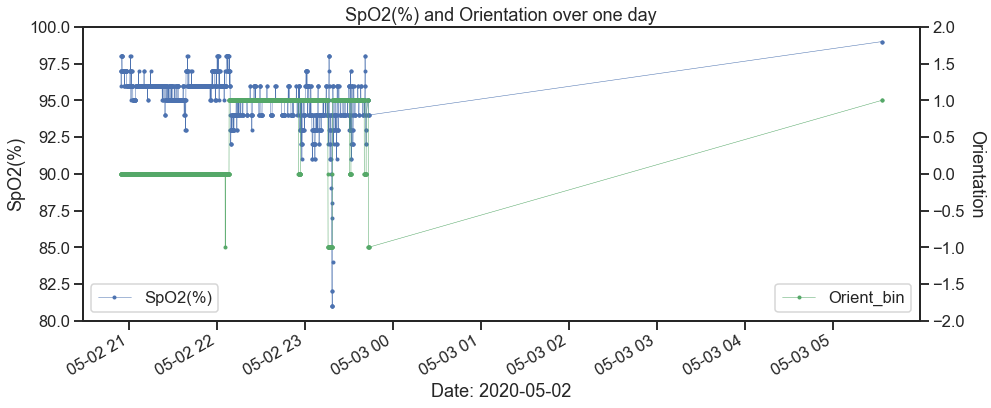

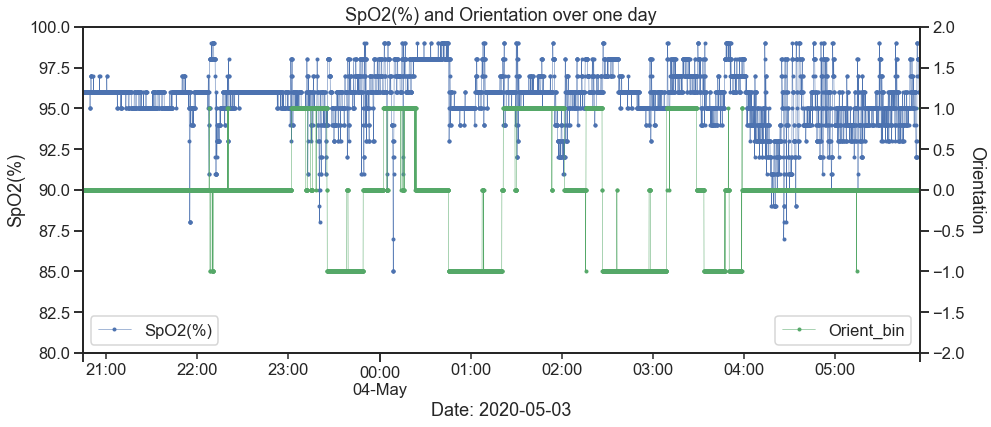

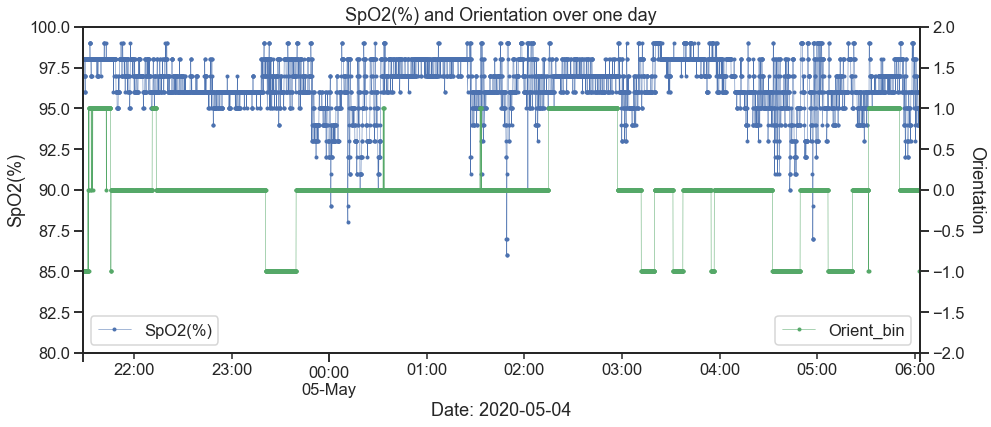

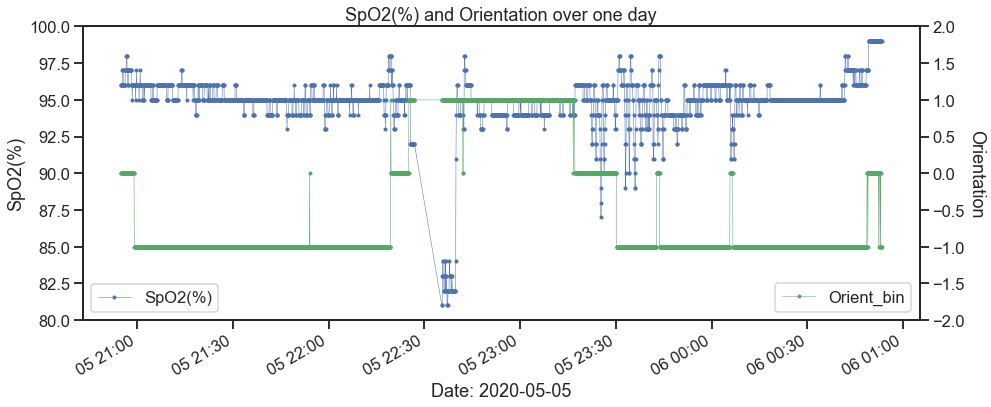

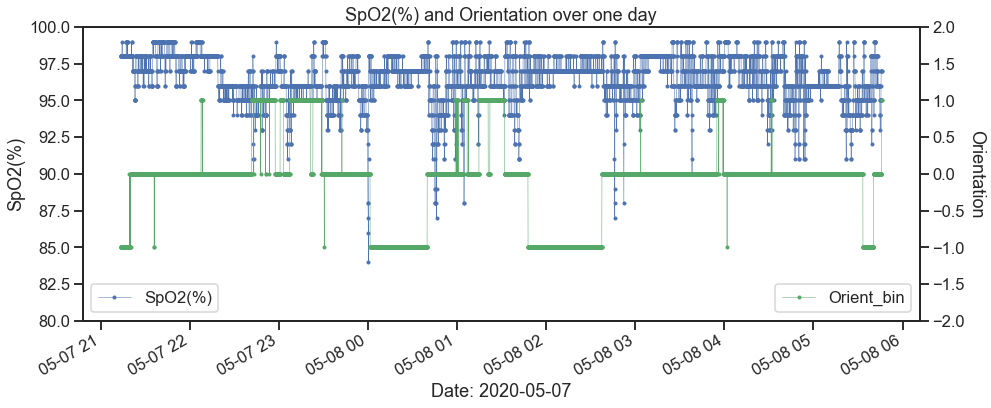

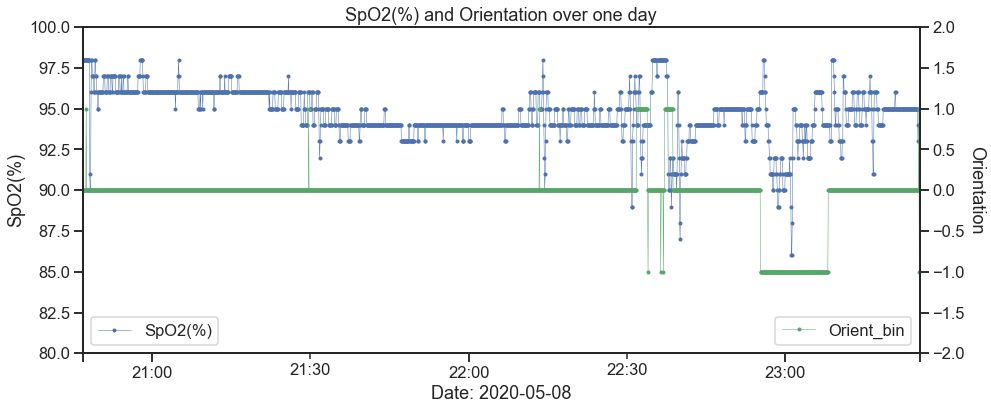

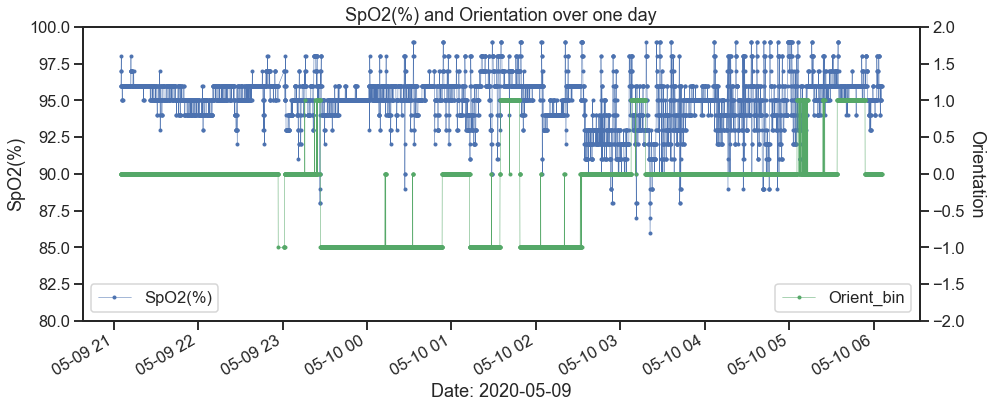

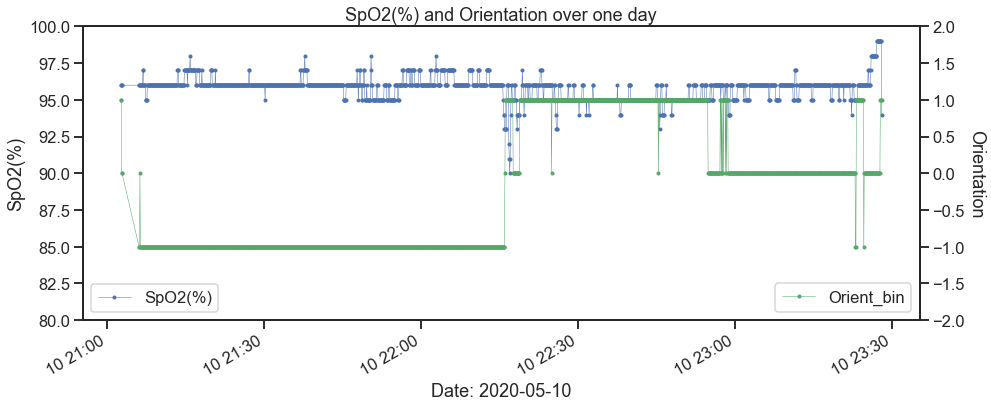

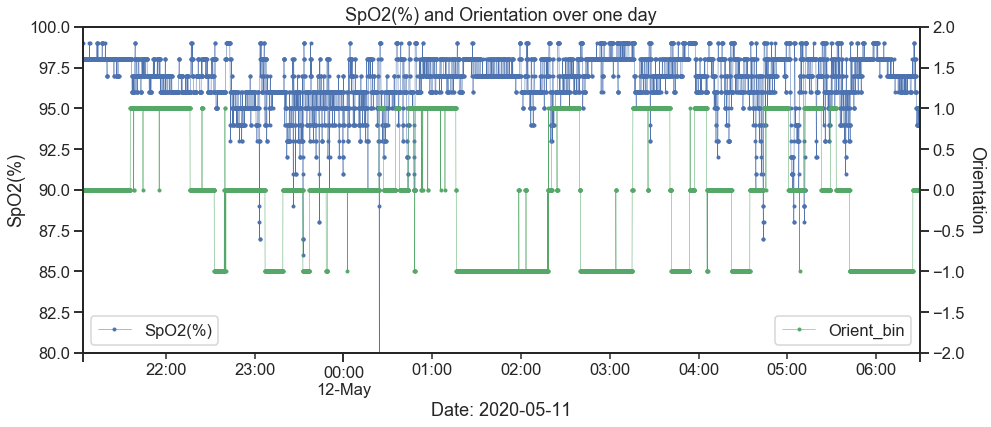

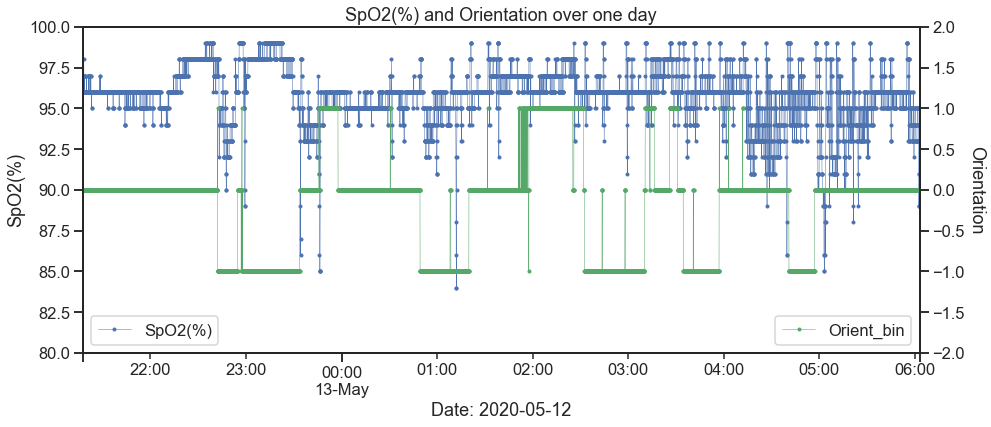

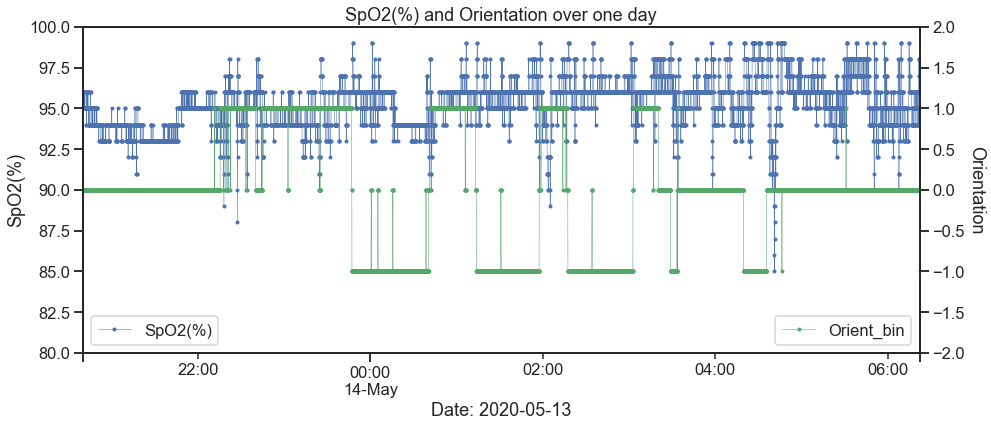

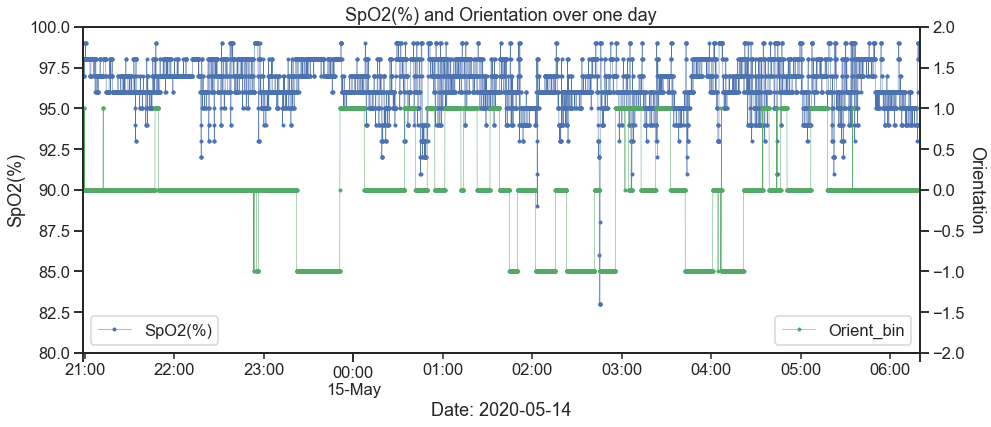

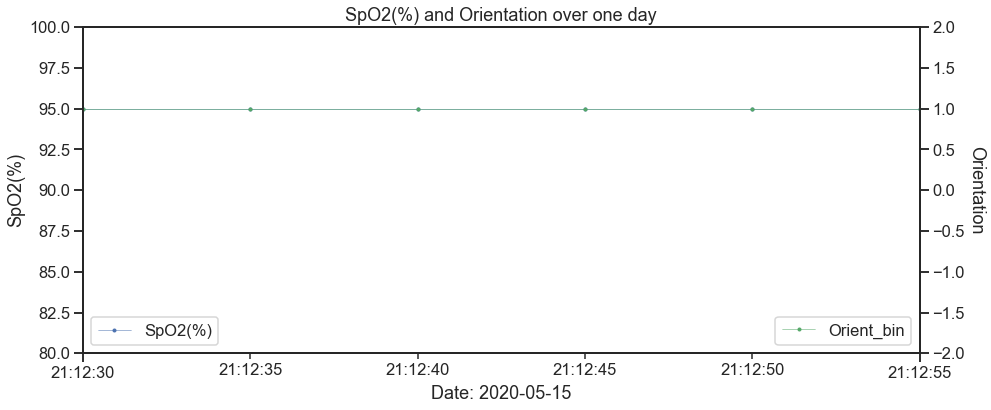

In [8]:
# Plot orientation and spo2 on same graph
for date in dates:
    date_df = df_subset[(df_subset["sleep_night"] == pd.Timestamp(date))]
    if date_df.shape[0] == 0:
        continue
    df_subset['sleep_night'].iloc[0] == date
    date_df['date_i_guess'] = date_df.index
    ax = date_df.plot("date_i_guess", "SpO2(%)", legend=False, linewidth=0.5, figsize=(15, 6),
                     markersize=3, marker="o", markerfacecolor="b")
    ax.legend(loc="lower left")
    ax2 = ax.twinx()
    date_df.plot(x="date_i_guess", y="Orient_bin", ax=ax2, linewidth=0.5, legend=False,
                 color="g", markersize=3, marker="o", markerfacecolor="g")
    ax.set(ylim=(80, 100))
    plt.title("SpO2(%) and Orientation over one day")
    ax.set_ylabel("SpO2(%)")
    ax2.set_ylabel("Orientation", rotation=270, labelpad=20)
    ax2.set(ylim=(-2, 2))
    ax.set_xlabel("Date: {}".format(date.date()))
    ax2.legend(loc="lower right")

In [9]:
# Now let's say a low oxygen effect is below 90
df_subset["low_oxygen"] = 0 # Not low
df_subset.loc[df_subset["SpO2(%)"] <= 90, "low_oxygen"] = 1 # Yes low oxygen

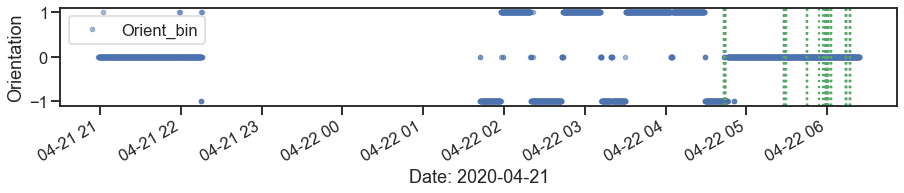

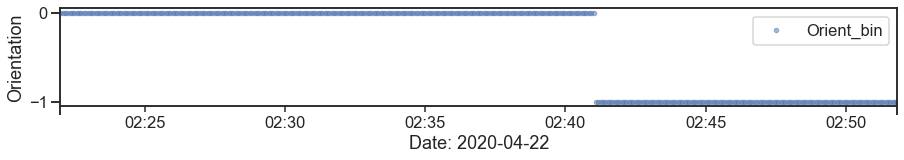

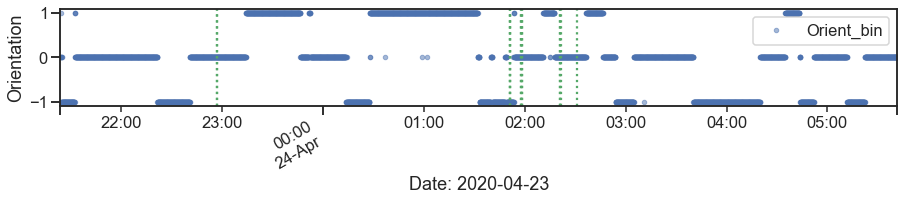

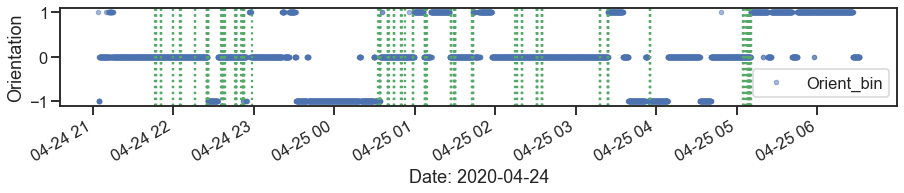

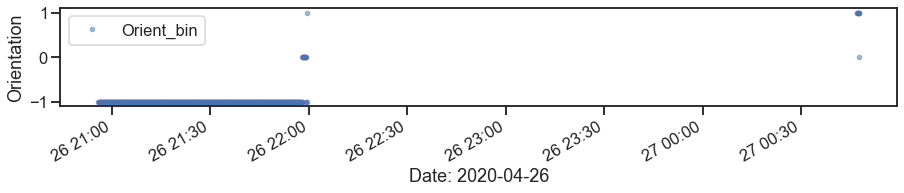

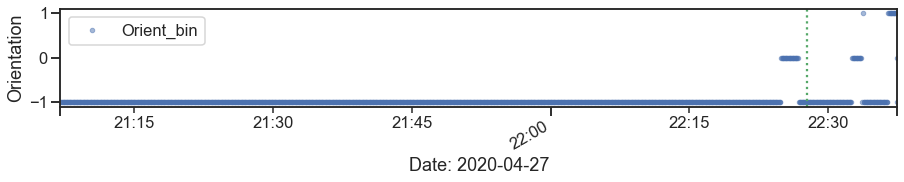

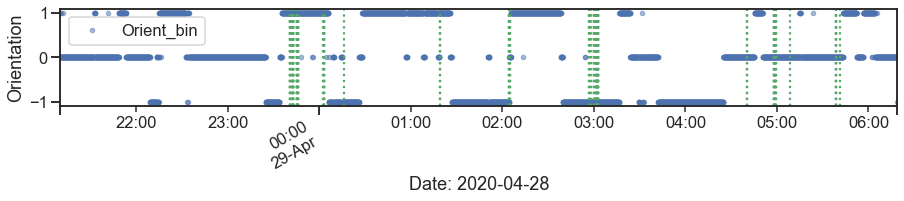

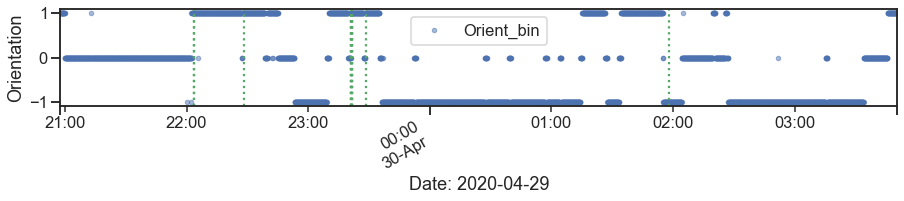

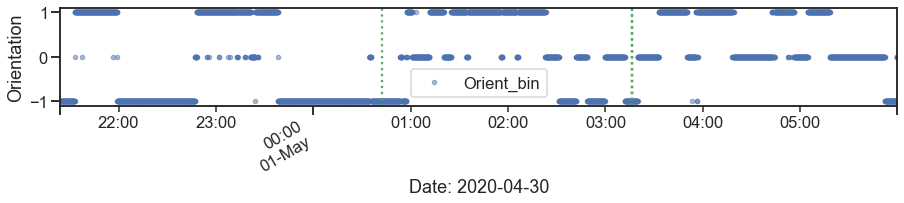

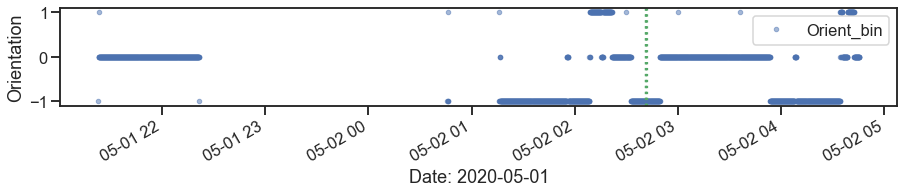

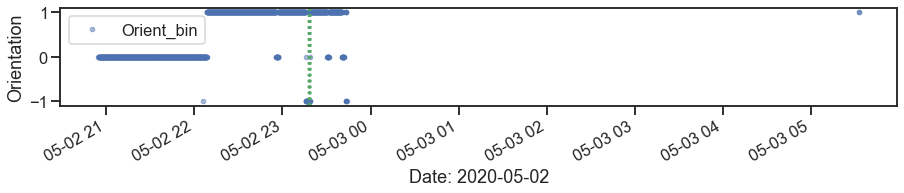

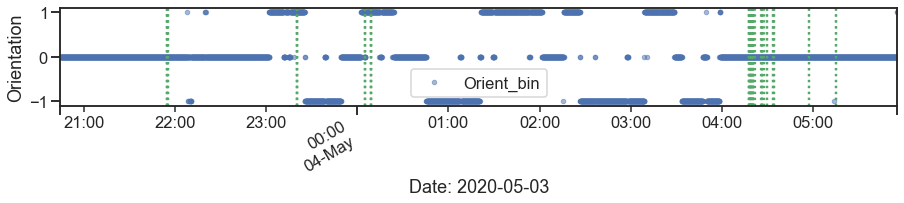

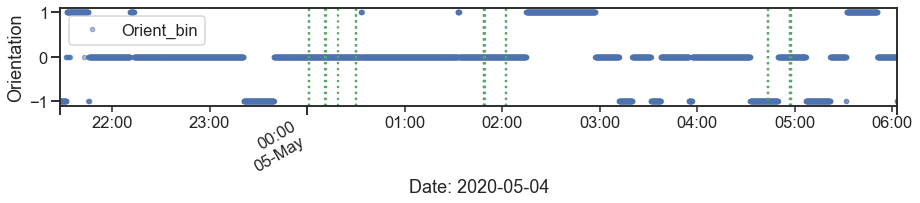

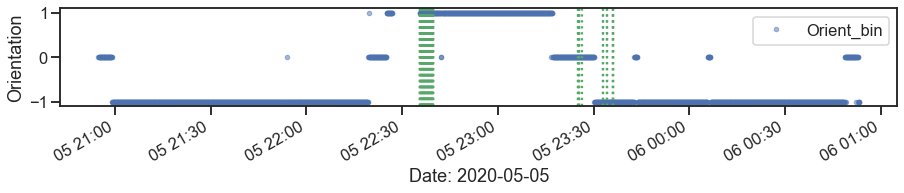

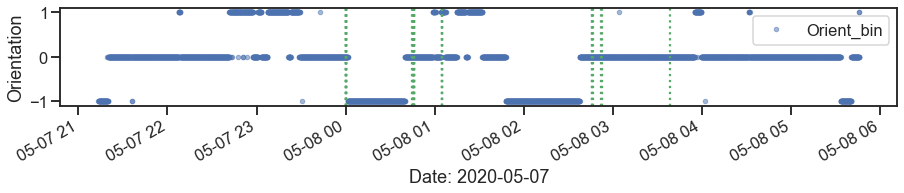

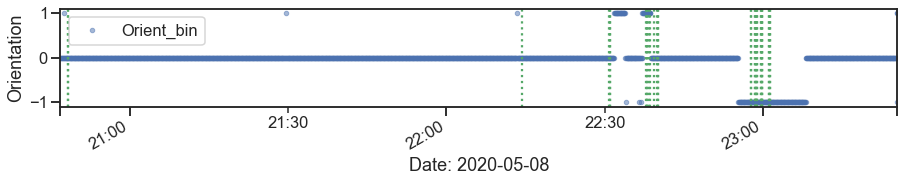

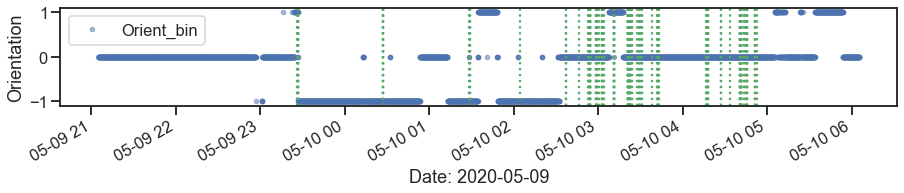

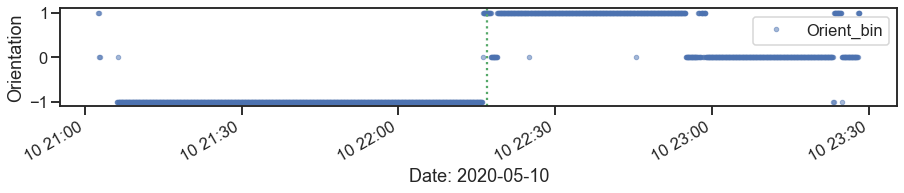

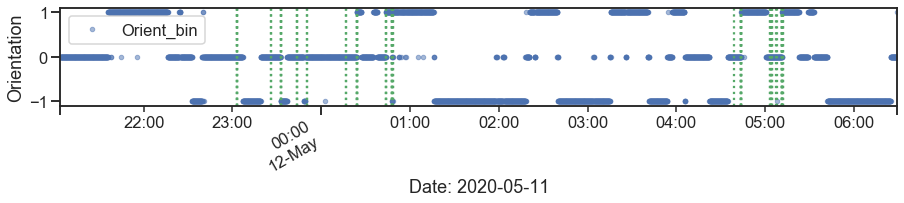

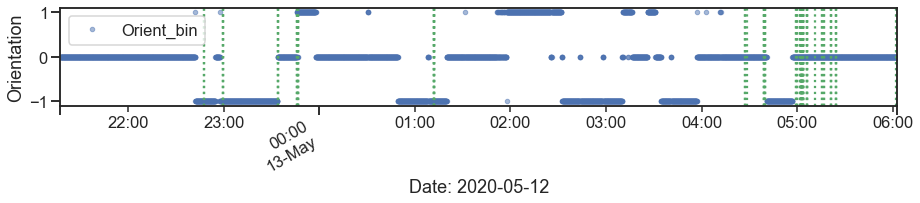

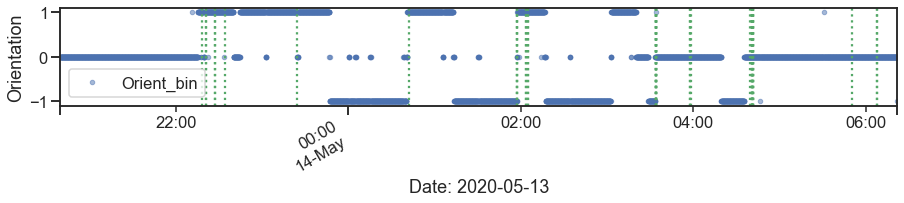

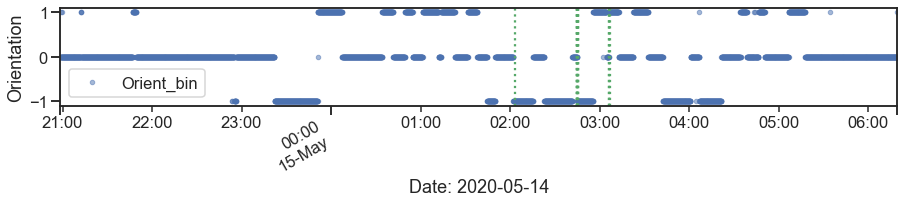

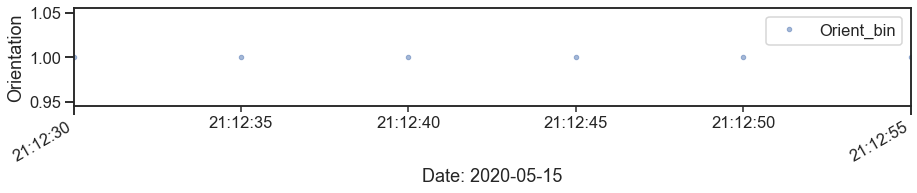

In [10]:
# Plot orientation and spo2 on same graph
for date in dates:
    date_df = df_subset[(df_subset["sleep_night"] == pd.Timestamp(date))]
    things = ["Orient_bin"] # Weird behavior that if I don't have this line, all graphs are ploted together
    axes = date_df[things].plot(marker='.', alpha=0.5, linestyle='None', figsize=(15, 2), subplots=True)
    axes[0].set_ylabel("Orientation")
    axes[0].set_xlabel("Date: {}".format(date.date()))
    low_oxy = date_df[date_df["low_oxygen"] == 1].index
    for xc in low_oxy:
        axes[0].axvline(x=xc, color='g', linestyle=':')

In [11]:
df_subset.groupby(["low_oxygen", "Orient_bin"]).size()

low_oxygen  Orient_bin
0           -1            28531
             0            49975
             1            21498
1           -1              124
             0              544
             1              155
dtype: int64

In [12]:
# Back sleeping for 50% of time NOT in low oxygen state (defined at > 90% SpO2)
# 0: back, -1: right, 1: left
df_subset["Orient_bin"].loc[(df_subset["low_oxygen"] == 0)].value_counts(normalize=True)

 0    0.499730
-1    0.285299
 1    0.214971
Name: Orient_bin, dtype: float64

In [13]:
# Back sleeping for 66% of time IN low oxygen state (defined as <= 90% SpO2)
# 0: back, -1: right, 1: left
df_subset["Orient_bin"].loc[(df_subset["low_oxygen"] == 1)].value_counts(normalize=True)

 0    0.660996
 1    0.188335
-1    0.150668
Name: Orient_bin, dtype: float64

Text(0.5, 1.0, 'Dist of low oxygen events per night')

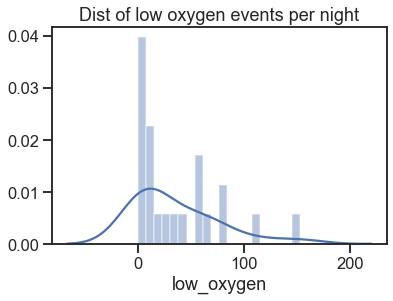

In [14]:
# Number of low oxygen events per night
num_by_sleep_night = df_subset.groupby('sleep_night').sum()
#print(num_by_sleep_night)

ax = sns.distplot(num_by_sleep_night["low_oxygen"].dropna(), bins=20, norm_hist=False)
ax.set_title("Dist of low oxygen events per night")

(167, 11)
(113, 11)


Text(0.5, 0, 'Number of low oxygen events')

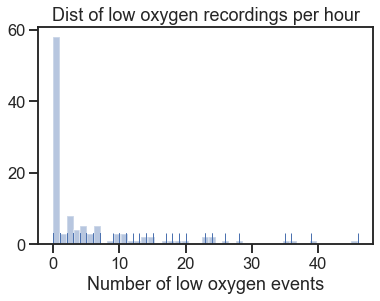

In [16]:
df_subset["hour_floor"] = [str(x) if x > 10 else "0" + str(x) for x in df_subset.index.hour]
num_measurements_per_hour = df_subset.groupby([df_subset.index.date, df_subset["hour_floor"]]).count().reset_index()
print(num_measurements_per_hour.shape)
print(num_measurements_per_hour[num_measurements_per_hour["Orientation"] == 720].shape) # Number of complete hours
hours_to_use = num_measurements_per_hour[num_measurements_per_hour["Orientation"] == 720]
test = hours_to_use["level_0"].astype(str) + " " + hours_to_use["hour_floor"].astype(str)
hours_to_use_2 = pd.to_datetime(test, format='%Y-%m-%d %H')
df_hi = df_subset.loc[(df_subset.index.floor('H').isin(hours_to_use_2)),:]

df_low = df_hi.groupby([df_hi.index.date, df_hi.index.hour]).sum()
#print(df_low)
ax = sns.distplot(df_low['low_oxygen'], bins=45, kde=False, rug=True)
ax.set_title("Dist of low oxygen recordings per hour")
ax.set_xlabel("Number of low oxygen events")

3600


Text(0.5, 0, 'Number of low oxygen events (Only nights >= 5 hours)')

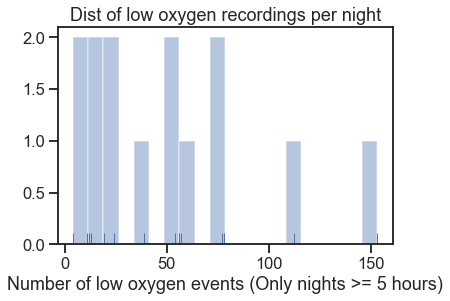

In [17]:
# Looking at nights with at least 6 hours, get the dist of low oxygen events per night #720 per hour
min_night_length = 720 * 5
print(min_night_length)

df_low = df_subset.groupby("sleep_night")["hour_floor"].count()
df_low_to_use = df_low[df_low > min_night_length]
df_night = df_subset[df_subset['sleep_night'].isin(df_low_to_use.index)]
df_night_to_plot = df_night.groupby('sleep_night')['low_oxygen'].sum()

ax = sns.distplot(df_night_to_plot, bins=20, kde=False, rug=True)
ax.set_title("Dist of low oxygen recordings per night")
ax.set_xlabel("Number of low oxygen events (Only nights >= 5 hours)")

Text(0.5, 1.0, 'Number low oxygen events by date')

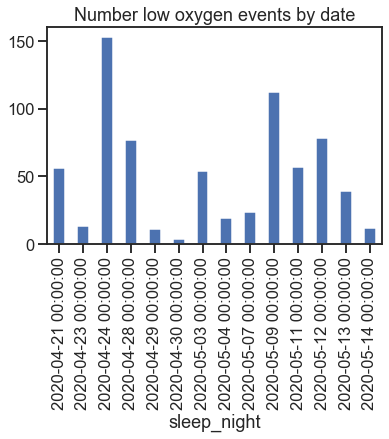

In [18]:
ax = df_night_to_plot.plot.bar()
ax.set_title("Number low oxygen events by date")

Text(0.5, 1, 'Number low oxygen events by day of the week')

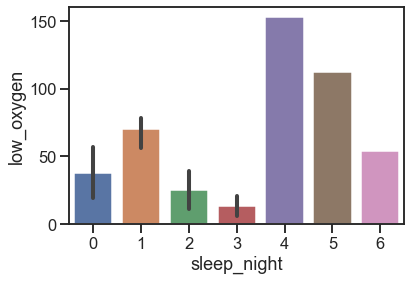

In [19]:
sns.barplot(x=df_night_to_plot.index.dayofweek, y=df_night_to_plot)
ax.set_title("Number low oxygen events by day of the week")
# Monday=0, Sunday=6

In [20]:
# Each minute pick orientation and df_subset.head()
df_subset['Orient_bin'] = df_subset['Orient_bin'].astype(int)
type(df_subset['Orient_bin'].iloc[0])
df_classifier = df_subset.resample('1Min').agg(['max', 'min', 'mean']).dropna()
df_classifier.shape

(8428, 24)

In [21]:
df_classifier.head()

Orientation                   Inclination         \
                            max    min       mean         max    min   
datetime                                                               
2020-04-21 20:58:00      -82.30 -82.30 -82.300000       68.07  68.07   
2020-04-21 20:59:00      -74.35 -82.46 -79.333333       71.69  68.04   
2020-04-21 21:00:00      -76.91 -79.71 -78.035000       72.01  67.56   
2020-04-21 21:01:00      -76.84 -78.45 -77.607500       69.21  68.72   
2020-04-21 21:02:00      -74.64 -95.48 -81.259167       71.23  64.00   

                               SpO2(%)                  Pulse Rate(bpm)  ...  \
                          mean     max   min       mean             max  ...   
datetime                                                                 ...   
2020-04-21 20:58:00  68.070000    96.0  96.0  96.000000            66.0  ...   
2020-04-21 20:59:00  69.678333    96.0  94.0  95.666667            70.0  ...   
2020-04-21 21:00:00  69.739167    97.0  96.0  96.083333            68.0  ...   
2020-04-21 21:01:00  68.950833    96.0  96.0  96.000000            68.0  ...   
2020-04-21 21:02:00  67.485833    97.0  96.0  96.083333            70.0  ...   

                       Motion Vibration           Orient_bin                 \
                         mean       max  min mean        max  min      mean   
datetime                                                                      
2020-04-21 20:58:00  0.000000       0.0  0.0  0.0        0.0  0.0  0.000000   
2020-04-21 20:59:00  3.583333       0.0  0.0  0.0        0.0  0.0  0.000000   
2020-04-21 21:00:00  0.416667       0.0  0.0  0.0        0.0  0.0  0.000000   
2020-04-21 21:01:00  0.416667       0.0  0.0  0.0        0.0  0.0  0.000000   
2020-04-21 21:02:00  1.500000       0.0  0.0  0.0        1.0  0.0  0.083333   

                    low_oxygen            
                           max  min mean  
datetime                                  
2020-04-21 20:58:00        0.0  0.0  0.0  
2020-04-21 20:59:00        0.0  0.0  0.0  
2020-04-21 21:00:00        0.0  0.0  0.0  
2020-04-21 21:01:00        0.0  0.0  0.0  
2020-04-21 21:02:00        0.0  0.0  0.0  

[5 rows x 24 columns]

In [22]:
df_classifier.columns = ['_'.join(col).strip() for col in df_classifier.columns.values]
df_classifier.head()

Orientation_max  Orientation_min  Orientation_mean  \
datetime                                                                  
2020-04-21 20:58:00           -82.30           -82.30        -82.300000   
2020-04-21 20:59:00           -74.35           -82.46        -79.333333   
2020-04-21 21:00:00           -76.91           -79.71        -78.035000   
2020-04-21 21:01:00           -76.84           -78.45        -77.607500   
2020-04-21 21:02:00           -74.64           -95.48        -81.259167   

                     Inclination_max  Inclination_min  Inclination_mean  \
datetime                                                                  
2020-04-21 20:58:00            68.07            68.07         68.070000   
2020-04-21 20:59:00            71.69            68.04         69.678333   
2020-04-21 21:00:00            72.01            67.56         69.739167   
2020-04-21 21:01:00            69.21            68.72         68.950833   
2020-04-21 21:02:00            71.23            64.00         67.485833   

                     SpO2(%)_max  SpO2(%)_min  SpO2(%)_mean  \
datetime                                                      
2020-04-21 20:58:00         96.0         96.0     96.000000   
2020-04-21 20:59:00         96.0         94.0     95.666667   
2020-04-21 21:00:00         97.0         96.0     96.083333   
2020-04-21 21:01:00         96.0         96.0     96.000000   
2020-04-21 21:02:00         97.0         96.0     96.083333   

                     Pulse Rate(bpm)_max  ...  Motion_mean  Vibration_max  \
datetime                                  ...                               
2020-04-21 20:58:00                 66.0  ...     0.000000            0.0   
2020-04-21 20:59:00                 70.0  ...     3.583333            0.0   
2020-04-21 21:00:00                 68.0  ...     0.416667            0.0   
2020-04-21 21:01:00                 68.0  ...     0.416667            0.0   
2020-04-21 21:02:00                 70.0  ...     1.500000            0.0   

                     Vibration_min  Vibration_mean  Orient_bin_max  \
datetime                                                             
2020-04-21 20:58:00            0.0             0.0             0.0   
2020-04-21 20:59:00            0.0             0.0             0.0   
2020-04-21 21:00:00            0.0             0.0             0.0   
2020-04-21 21:01:00            0.0             0.0             0.0   
2020-04-21 21:02:00            0.0             0.0             1.0   

                     Orient_bin_min  Orient_bin_mean  low_oxygen_max  \
datetime                                                               
2020-04-21 20:58:00             0.0         0.000000             0.0   
2020-04-21 20:59:00             0.0         0.000000             0.0   
2020-04-21 21:00:00             0.0         0.000000             0.0   
2020-04-21 21:01:00             0.0         0.000000             0.0   
2020-04-21 21:02:00             0.0         0.083333             0.0   

                     low_oxygen_min  low_oxygen_mean  
datetime                                              
2020-04-21 20:58:00             0.0              0.0  
2020-04-21 20:59:00             0.0              0.0  
2020-04-21 21:00:00             0.0              0.0  
2020-04-21 21:01:00             0.0              0.0  
2020-04-21 21:02:00             0.0              0.0  

[5 rows x 24 columns]

In [23]:
print(df_classifier.describe())

       Orientation_max  Orientation_min  Orientation_mean  Inclination_max  \
count      8428.000000      8428.000000       8428.000000      8428.000000   
mean        -10.590191       -20.568897        -15.727916        94.399796   
std          74.091186        73.537016         72.705861        18.184437   
min        -136.500000      -179.630000       -136.604167        48.400000   
25%         -75.450000       -83.372500        -78.651042        78.862500   
50%          -9.195000       -20.110000        -15.412917        97.610000   
75%          69.660000        61.152500         63.642292       107.390000   
max         179.510000       174.930000        175.446667       178.910000   

       Inclination_min  Inclination_mean  SpO2(%)_max  SpO2(%)_min  \
count      8428.000000       8428.000000  8428.000000  8428.000000   
mean         90.274215         92.341241    96.717252    94.880043   
std          17.151133         17.029974     1.459928     1.954378   
min          46.4

In [24]:
result = df_classifier.groupby('Orient_bin_min')['low_oxygen_max'].mean()
print("Probability of a low oxygen event per minute, by position (-1: right, 0: back, 1: left)")
print(result)

Probability of a low oxygen event per minute, by position (-1: right, 0: back, 1: left)
Orient_bin_min
-1.0    0.019592
 0.0    0.043874
 1.0    0.015713
Name: low_oxygen_max, dtype: float64


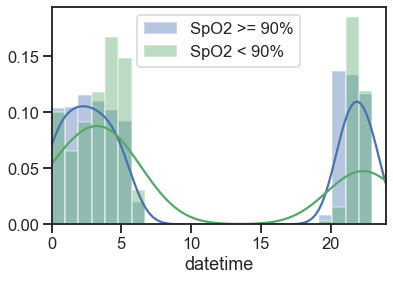

In [25]:
# Low oxygen events tend to occur slightly later in the night

# Time since start of position
# Time of night
fig, ax = plt.subplots()
sns.distplot(df_subset[df_subset["low_oxygen"] == 0].index.hour,
                  ax=ax, bins=24, label="SpO2 >= 90%")
sns.distplot(df_subset[df_subset["low_oxygen"] == 1].index.hour,
            ax=ax, label="SpO2 < 90%", bins=24, color='g')
ax.set_xlim([0, 24])
ax.legend()

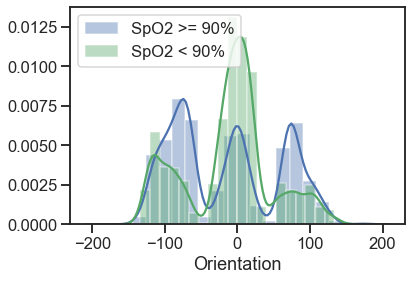

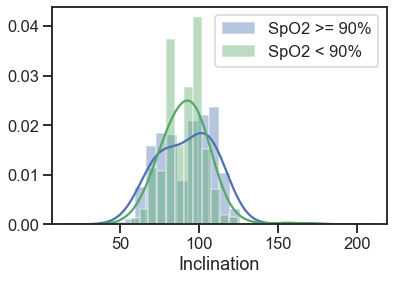

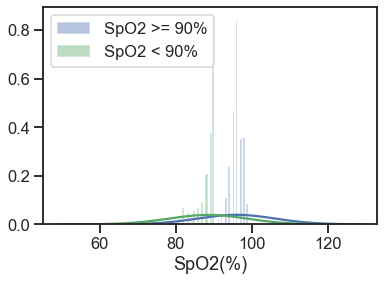

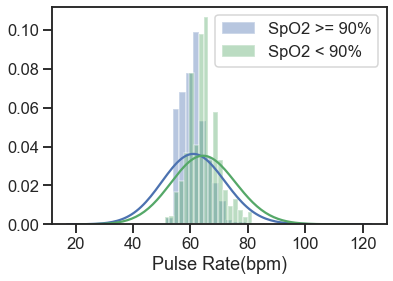

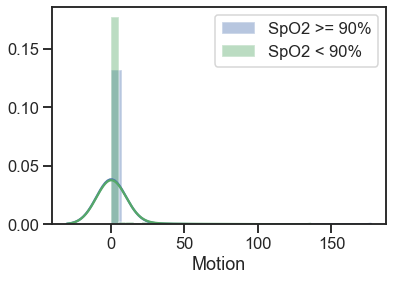

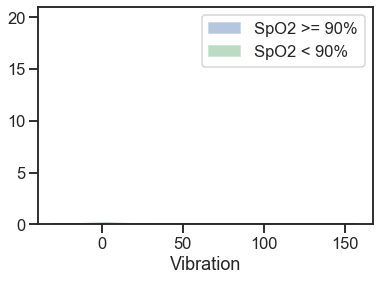

In [28]:
# See if any of the other features differ in the low oxygen states
# Looks like heart rate tends to be higher, which is interesting

for col in df_subset.columns:
    if col in ["sleep_night", "hour_floor", "low_oxygen", "Orient_bin"]:
        continue
    fig, ax = plt.subplots()
    sns.distplot(df_subset[col].loc[df_subset["low_oxygen"] == 0],
                      ax=ax, bins=20, label="SpO2 >= 90%", kde_kws={'bw': 10.0})
    sns.distplot(df_subset[col].loc[df_subset["low_oxygen"] == 1],
                ax=ax, label="SpO2 < 90%", bins=20, color='g', kde_kws={'bw': 10.0})
    ax.legend()